In [1]:
import pytao
print(pytao.__version__)

import pmd_beamphysics
print(pmd_beamphysics.__version__)

0.5.3
0.10.1


In [2]:
#Import all the UTILITY functions
from UTILITY_quickstart import *

In [3]:
#Import all the UTILITY functions
from UTILITY_quickstart import *

#Load a default configuration
importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline.yml")
#importedDefaultSettings = importedDefaultSettings | { "centerBC14" : False, "centerBEGBC20" : False}



#Initialize tao object
tao = initializeTao(
    csrTF = False,

    #Commands to start and run IMPACT. Overwriting some default settings, just to demonstrate
    runImpactTF = True,
    numMacroParticles = 1e4,
    impactChargepC = 1800,
    impactGridCount = 8
)

# tao = initializeTao(
#     csrTF = False,
    
# )

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-S2E
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using /Users/nmajik/Documents/SLAC/FACET2-S2E/setLattice_configs/defaults.yml
Running Impact
	 Impact: Autophasing
	 Impact: Distgen
	 Impact: Tracking
Running Impact-T in /Users/nmajik/Documents/SLAC/FACET2-S2E/impact/tmpii7b6bde
/opt/homebrew/anaconda3/envs/bmad2025-06-27/bin/ImpactTexe
writing 10000 particles to /Users/nmajik/Documents/SLAC/FACET2-S2E/impact/tmpii7b6bde/partcl.data
Cathode start with cathode_kinetic_energy_ref = 1.0 eV
Cathode start: Replaced Np with 10000 according to initial particles
Cathode start: Replaced Bkenergy with 1.0 according to initial particles
Cathode start: Replaced Temission with 6.97502773839391e-12 according to initial particles
Cathode start: Replaced Tini with -3.4942219079267073e-12 according to initial particles
Setting total charge to 1.8e-09 C
 !----------------------------------------

In [4]:
trackBeam(tao, trackEnd = "L0BFEND", **importedDefaultSettings)
(getBeamAtElement(tao, "L0AFEND")).charge

np.float64(1.8e-09)

In [5]:
# allAssertedPhases = []
# meanEnergy = []
# evalElement = "L0BFEND"

# for assertedPhaseDeg in np.arange(-30, 30, 2):
#     tao.cmd(f"set ele L0BF PHI0 = {assertedPhaseDeg/360}")
    
#     trackBeam(tao, trackEnd = evalElement, **importedDefaultSettings)

#     P = getBeamAtElement(tao, evalElement)

#     allAssertedPhases.append(assertedPhaseDeg)
#     meanEnergy.append( P["mean_energy"] ) 

# plt.scatter( allAssertedPhases, meanEnergy )

# #Back to nominal
# tao.cmd(f"set ele L0BF PHI0 = {-15.0/360}")

In [6]:
# allAssertedPhases = []
# meanEnergy = []

# evalElement = "ENDL1F"

# for assertedPhaseDeg in np.arange(-30, 30, 3):
#     setLinacPhase(tao, "L1", assertedPhaseDeg)
    
#     trackBeam(tao, trackEnd = evalElement, **importedDefaultSettings)

#     P = getBeamAtElement(tao, evalElement)

#     allAssertedPhases.append(assertedPhaseDeg)
#     meanEnergy.append( P["mean_energy"] ) 

# plt.scatter( allAssertedPhases, meanEnergy )

# #Back to nominal
# setLinacPhase(tao, "L1", -20)

In [7]:
# allAssertedPhases = []
# meanEnergy = []

# evalElement = "ENDL2F"

# for assertedPhaseDeg in np.arange(-30, 30, 3):
#     setLinacPhase(tao, "L2", assertedPhaseDeg)
    
#     trackBeam(tao, trackEnd = evalElement, **importedDefaultSettings)

#     P = getBeamAtElement(tao, evalElement)

#     allAssertedPhases.append(assertedPhaseDeg)
#     meanEnergy.append( P["mean_energy"] ) 

# plt.scatter( allAssertedPhases, meanEnergy )

# #Back to nominal
# setLinacPhase(tao, "L2", -38)

In [8]:
# allAssertedPhases = []
# meanEnergy = []

# evalElement = "BEGBC20"

# for assertedPhaseDeg in np.arange(-30, 30, 3):
#     setLinacPhase(tao, "L3", assertedPhaseDeg)
    
#     trackBeam(tao, trackEnd = evalElement, **importedDefaultSettings)

#     P = getBeamAtElement(tao, evalElement)

#     allAssertedPhases.append(assertedPhaseDeg)
#     meanEnergy.append( P["mean_energy"] ) 

# plt.scatter( allAssertedPhases, meanEnergy )

# #Back to nominal
# setLinacPhase(tao, "L3", 0.0)

In [9]:
evalElement = "ENDL2F"



trackBeam(tao, trackEnd = evalElement, verbose = True, **importedDefaultSettings)

P = getBeamAtElement(tao, evalElement)

Loaded /Users/nmajik/Documents/SLAC/FACET2-S2E/beams/activeBeamFile.h5
Set track_start = L0AFEND, track_end = ENDL2F
Tracking!
trackBeam() exiting


In [10]:
evalElement = "BEGBC20"



trackBeam(tao, trackEnd = evalElement, verbose = True, **importedDefaultSettings)

P = getBeamAtElement(tao, evalElement)

Loaded /Users/nmajik/Documents/SLAC/FACET2-S2E/beams/activeBeamFile.h5
Set track_start = L0AFEND, track_end = BEGBC20
Set track_end = BEGBC14_1
Tracking!
Beam centered at BEGBC14 written to /Users/nmajik/Documents/SLAC/FACET2-S2E/beams/patchBeamFile.h5
Loaded /Users/nmajik/Documents/SLAC/FACET2-S2E/beams/patchBeamFile.h5
Set track_start = BEGBC14_1, track_end = BEGBC20
Tracking!
trackBeam() exiting


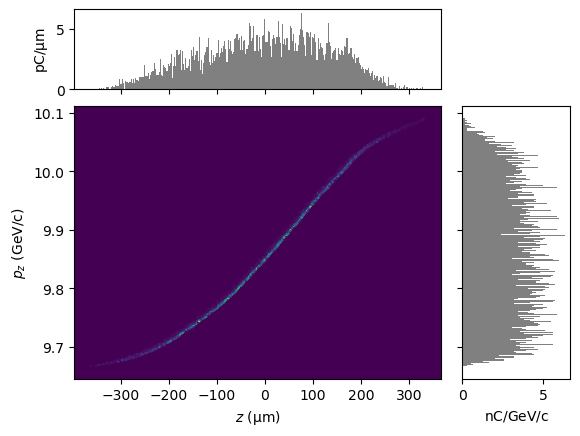

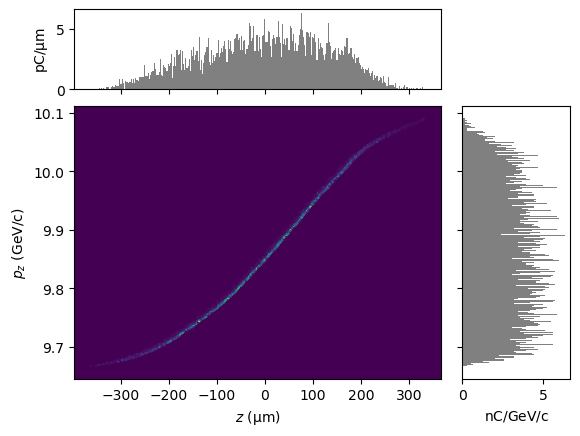

In [11]:
P = getBeamAtElement(tao, "BEGBC20")

display(plotMod(P, 'z', 'pz', bins=300))

In [12]:
tao.cmd("show lat MARKER::*")

['# Values shown are for the Downstream End of each Element (Girder elements shown at ref point):',
 '# Index  name       key                       s       l    beta   phi_a    eta   orbit    beta   phi_b    eta   orbit  Track',
 '#                                                             a   [2pi]      x  x [mm]       b   [2pi]      y  y [mm]  State',
 '      3  BEGINJ     Marker                0.000   0.000    0.14  -0.000   0.00   0.000    0.37  -0.000   0.00   0.000  Alive',
 '     28  DLFDAF     Marker                1.091   0.000   14.22   0.360   0.00   0.000   12.16   0.414   0.00   0.000  Alive',
 '     33  L0AFMID    Marker                2.580   0.000   36.51   0.369   0.00   0.000   35.52   0.424   0.00   0.000  Alive',
 '     35  OUTCPAF    Marker                4.067   0.000   48.44   0.375   0.00   0.000   50.68   0.430   0.00   0.000  Alive',
 '     37  L0AFEND    Marker                4.127   0.000   48.83   0.375   0.00   0.000   51.21   0.430   0.00   0.000  Alive

In [13]:
tao.cmd("show ele BEGBC20 -all")

['Element # 1294',
 'Element Name: BEGBC20',
 'Key: Marker',
 'S_start, S:    929.537145,    929.537145',
 'Ref_time_start, Ref_time:  3.100619E-06,  3.100619E-06',
 '',
 'Attribute values:',
 '    1  L                           =  0.0000000E+00 m',
 '    2  TILT                        =  0.0000000E+00 rad      60  TILT_TOT                    =  0.0000000E+00 rad',
 '    3  X_GAIN_ERR                  =  0.0000000E+00 m         4  Y_GAIN_ERR                  =  0.0000000E+00 m',
 '    5  CRUNCH                      =  0.0000000E+00 rad      21  CRUNCH_CALIB                =  0.0000000E+00 rad',
 '    6  NOISE                       =  0.0000000E+00          26  N_SAMPLE                    =  0.0000000E+00',
 '    7  OSC_AMPLITUDE               =  0.0000000E+00 m',
 '    8  X_GAIN_CALIB                =  0.0000000E+00 m        20  Y_GAIN_CALIB                =  0.0000000E+00 m',
 '   22  X_OFFSET_CALIB              =  0.0000000E+00 m        23  Y_OFFSET_CALIB              =  0.0000000E+0